In [7]:
import time
import praw
import pandas as pd

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)



params = {'sort':'new', 'limit':None}

columns = ['author', 'author_flair_text', 'clicked', 'comments', 'created_utc',
           'distinguished', 'edited', 'id', 'is_original_content', 'is_self',
           'link_flair_template_id', 'link_flair_text', 'locked', 'name',
           'num_comments', 'over_18', 'permalink', 'poll_data', 'saved', 'score',
           'selftext', 'spoiler', 'stickied', 'subreddit', 'title', 'upvote_ratio', 'url']

df = pd.DataFrame(columns=columns)

for submission in reddit.subreddit("all").search("kelowna", **params):
    new_row = {
        'author': submission.author.name,
        'created_utc': submission.created_utc,
        'id': submission.id,
        'name': submission.name,
        'num_comments': submission.num_comments,
        'selftext': submission.selftext,
        'subreddit': submission.subreddit.display_name,
        'title': submission.title,
        'upvote_ratio': submission.upvote_ratio,
        'url': submission.url
    }
    df.loc[len(df)] = new_row



df.to_csv('./reddit.csv', index=False)
df.head()


,author,author_flair_text,clicked,comments,created_utc,distinguished,edited,id,is_original_content,is_self,...,poll_data,saved,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,Spyrokid77666,NaN,NaN,NaN,1.692824e+09,NaN,NaN,15zge9h,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,spyrokidnews,WILDFIRES: 'Monumental loss': Fire evacuees fr...,1.00,https://bc.ctvnews.ca/monumental-loss-fire-eva...
1,aidanmack11,NaN,NaN,NaN,1.692824e+09,NaN,NaN,15zg9lj,NaN,NaN,...,NaN,NaN,NaN,"Hey everyone, \nFor people who are still tryin...",NaN,NaN,kelowna,Rentals to YVR,0.90,https://www.reddit.com/r/kelowna/comments/15zg...
2,No_Tumbleweed_544,NaN,NaN,NaN,1.692823e+09,NaN,NaN,15zfnkt,NaN,NaN,...,NaN,NaN,NaN,[https://www.youtube.com/watch?v=EseiYWZ9tdw&t...,NaN,NaN,kelowna,Central Okanagan Regional Emergency News Confe...,1.00,https://www.reddit.com/r/kelowna/comments/15zf...
3,leonardo146,NaN,NaN,NaN,1.692822e+09,NaN,NaN,15zfgc6,NaN,NaN,...,NaN,NaN,NaN,"Considering the travel ban has been lifted, I ...",NaN,NaN,kelowna,"Now that things are settling down, would it be...",0.63,https://www.reddit.com/r/kelowna/comments/15zf...
4,K3YJ,NaN,NaN,NaN,1.692822e+09,NaN,NaN,15zfeei,NaN,NaN,...,NaN,NaN,NaN,Check the filter to see if it is packaged in p...,NaN,NaN,kelowna,So you bought an Air purifier. Make sure you d...,0.67,https://www.reddit.com/r/kelowna/comments/15zf...


In [11]:
df['created_utc_clean'] = df['created_utc'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
df['created_utc_clean'].head()

0    2023-08-23 14:55:24
1    2023-08-23 14:50:27
2    2023-08-23 14:28:54
3    2023-08-23 14:21:38
4    2023-08-23 14:19:51
Name: created_utc_clean, dtype: object

In [12]:
df['created_utc_clean'].tail()

243    2023-08-20 00:46:08
244    2023-08-20 00:38:29
245    2023-08-19 23:54:41
246    2023-08-19 23:37:46
247    2023-08-19 23:28:26
Name: created_utc_clean, dtype: object

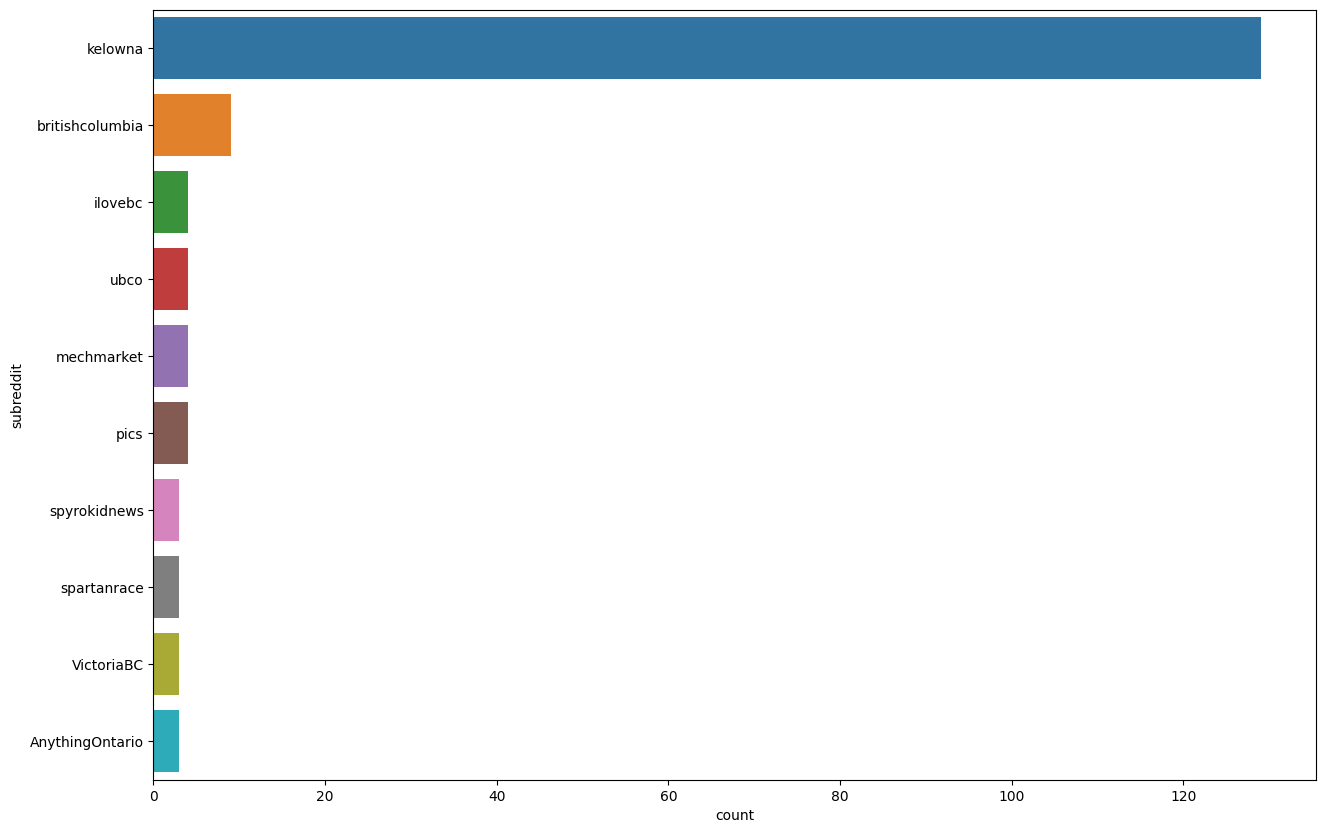

In [13]:
# create a fig with most frequent subreddits
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="subreddit", data=df, order=df['subreddit'].value_counts().iloc[:10].index, ax=ax)
plt.show()

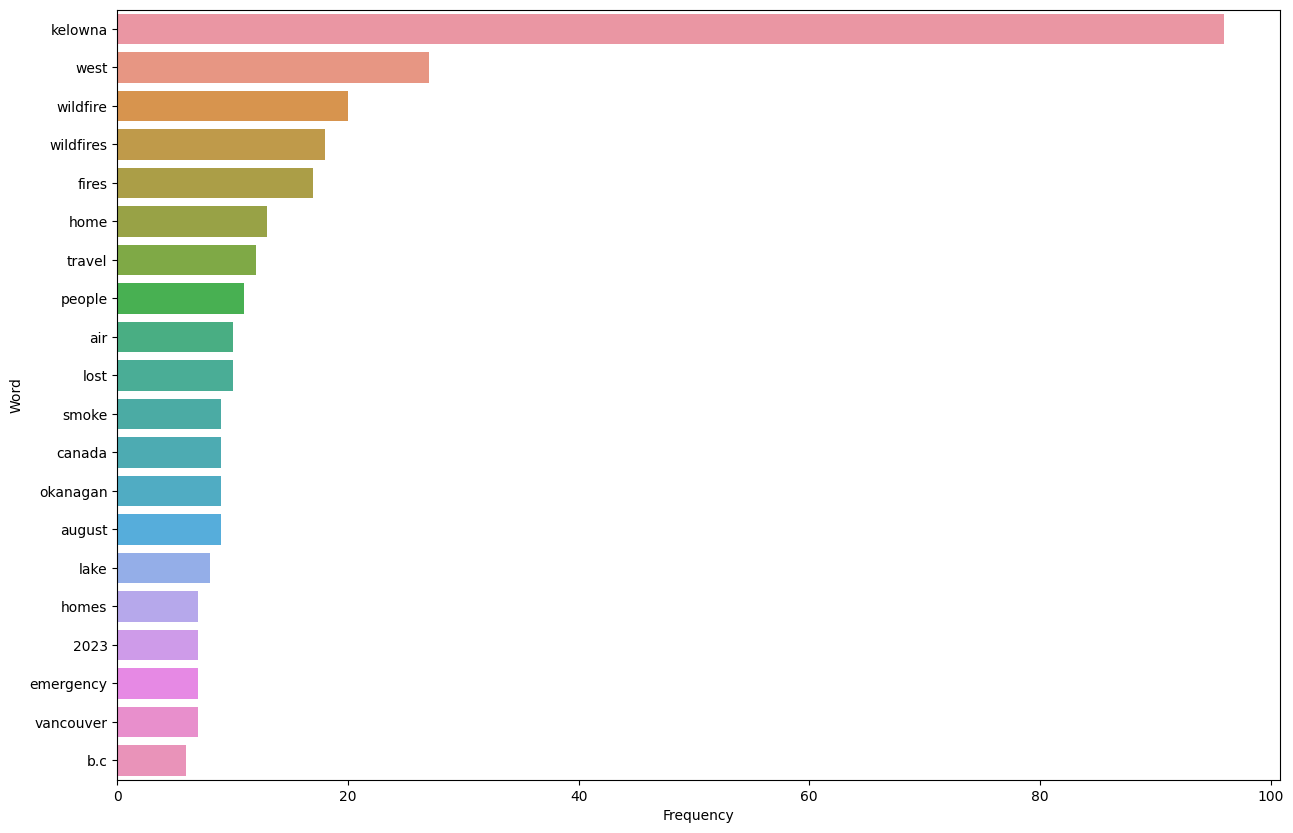

In [19]:
# create a fig with most keywords in titles
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS


fig, ax = plt.subplots(figsize=(15, 10))
all_titles = ' '.join(df['title'].tolist())
all_titles = all_titles.lower()
words = word_tokenize(all_titles)
word_counts = Counter(words)
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)
word_counts_df = word_counts_df[word_counts_df['Word'].str.len() > 2]
word_counts_df = word_counts_df[~word_counts_df['Word'].isin(STOPWORDS)]

sns.barplot(x="Frequency", y="Word", data=word_counts_df.iloc[:20], ax=ax)
plt.show()